# <center>机器视觉精品课程-神经网络部分 </center>

### 授课内容
- **神经网络基础：损失函数、神经元结构、多层感知机、手写数字识别**
- 神经网络基础：梯度下降、`Back Propagation`
- 神经网络基础：`Softmax`回归、深度神经网络、卷积神经网络
- 神经网络基础：循环神经网络、`NLP`自然语言处理、服务器资源、线上课程资源

<div align=center>
<img src="images/图像识别/幻灯片3.JPG" alt="幻灯片" style="zoom:120%;" />

<div align=center>
    <img src="images/图像识别/幻灯片4.JPG" alt="幻灯片" style="zoom:120%;" />

<div align=center>
    <img src="images/图像识别/幻灯片5.JPG" alt="幻灯片" style="zoom:120%;" />

<div align=center>
    <img src="images/图像识别/幻灯片6.JPG" alt="幻灯片" style="zoom:120%;" />

# 举例-线性回归

- **回归**（regression）是能为一个或多个自变量与因变量之间关系建模的一类方法。

- 在机器学习领域中的大多数任务通常都与**预测**（prediction）有关。

- 常见的例子包括：预测价格（房屋、股票等）、预测住院时间（针对住院病人等）、预测需求（零售销量等）。

## 线性回归的基本元素

为了解释**线性回归**，我们举一个实际的例子：
我们希望根据房屋的$\color{red} {面积} $（平方英尺）和$\color{red} {房龄} $（年）来估算$\color{red} {房屋价格} $（美元）。
为了开发一个能预测房价的模型，我们需要收集一个真实的数据集。
这个数据集包括了房屋的销售价格、面积和房龄。

在机器学习的术语中
- 数据集会被分为为*训练数据集*（training data set）或*训练集*（training set）。
- 每行数据（比如一次房屋交易相对应的数据）称为*样本*（sample），也可以称为*数据点*（data point）或*数据样本*（data instance）。
- 把试图预测的目标（比如预测房屋价格）称为*标签*（label）或*目标*（target）。
- 预测所依据的自变量（面积和房龄）称为*特征*（feature）或*协变量*（covariate）。

通常，我们使用$n$来表示数据集中的样本数。
对索引为$i$的样本，其输入表示为$\mathbf{x}^{(i)} = [x_1^{(i)}, x_2^{(i)}]^\top$，
其对应的标签是$y^{(i)}$。

# <center>模型 = 框架 + 参数</center>
### 线性模型


线性假设目标（房屋价格）可以表示为特征（面积和房龄）的加权和，如下面的式子：

$$\mathrm{price} = w_{\mathrm{area}} \cdot \mathrm{area} + w_{\mathrm{age}} \cdot \mathrm{age} + b.$$

其中：
- $area$和$age$ 称为*特征*（feature）。
- $w_{\mathrm{area}}$和$w_{\mathrm{age}}$ 称为*权重*（weight），权重决定了每个特征对我们预测值的影响。
- $b$称为*偏置*（bias）、*偏移量*（offset）或*截距*（intercept）。偏置是指当所有特征都取值为0时，预测值应该为多少。



目标：
- 使用给定数据集，寻找模型的权重$\mathbf{w}$和偏置$b$
- 使得根据模型做出的预测大体符合数据里的真实价格。


### 损失函数

#### 均方误差 MSE（mean squared error）

在我们开始考虑如何用模型*拟合*（fit）数据之前，我们需要确定一个拟合程度的**度量**。
- *损失函数*（loss function）能够量化目标的*实际*值与*预测*值之间的差距。
- 通常我们会选择非负数作为损失，且数值越小表示损失越小，完美预测时的损失为0。
- 回归问题中最常用的损失函数是平方误差函数。
- 当样本$i$的预测值为$\hat{y}^{(i)}$，其相应的真实标签为$y^{(i)}$时，
平方误差可以定义为以下公式：

$$l^{(i)}(\mathbf{w}, b) = \frac{1}{2} \left(\hat{y}^{(i)} - y^{(i)}\right)^2.$$

<!-- <div align=center>
    <img src="../../../d2l-zh/pytorch/img/fit-linreg.svg" alt="用线性模型拟合数据" style="zoom:120%;" />
</div> -->

- 为了度量模型在整个数据集上的质量，我们需计算在训练集$n$个样本上的损失均值（也等价于求和）。

$$L(\mathbf{w}, b) =\frac{1}{n}\sum_{i=1}^n l^{(i)}(\mathbf{w}, b) =\frac{1}{n} \sum_{i=1}^n \frac{1}{2}\left(\mathbf{w}^\top \mathbf{x}^{(i)} + b - y^{(i)}\right)^2.$$

- 在训练模型时，我们希望寻找一组参数（$\mathbf{w}^*, b^*$），这组参数能最小化在所有训练样本上的总损失。如下式：

$$\mathbf{w}^*, b^* = \operatorname*{argmin}_{\mathbf{w}, b}\  L(\mathbf{w}, b).$$

### 梯度下降

- 用到一种名为*梯度下降*（gradient descent）的方法，这种方法几乎可以优化所有深度学习模型。
- 它通过不断地在损失函数递减的方向上更新参数来降低误差。
- 梯度下降最简单的用法是计算损失函数（数据集中所有样本的损失均值）关于模型参数的导数（在这里也可以称为梯度）。

- 我们用下面的数学公式来表示这一更新过程（$\partial$表示偏导数）：

$$(\mathbf{w},b) \leftarrow (\mathbf{w},b) - \mathcal{lr}\sum_{i \in \mathcal{B}} \partial_{(\mathbf{w},b)} l^{(i)}(\mathbf{w},b).$$

总结一下，算法的步骤如下：

（1）初始化模型参数的值，如随机初始化；

（2）利用数据集在负梯度的方向上更新参数，并不断迭代这一步骤。

In [51]:
import matplotlib.pyplot as plt
import torch

x = torch.linspace(-2, 2, steps =100,requires_grad=True) 
y = x**2
y.backward(torch.ones_like(x))

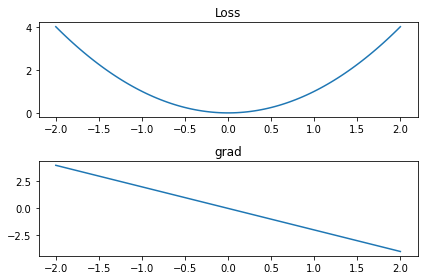

In [57]:
z = x.grad
# 激活第一个 subplot
plt.subplot(2,  1,  1)  
# 绘制第一个图像 
plt.plot(x.detach().numpy(), y.detach().numpy()) 
plt.title('Loss')  
# 将第二个 subplot 激活，并绘制第二个图像
plt.subplot(2,  1,  2) 
plt.plot(x.detach().numpy(),-z)
plt.title('grad')  
# 展示图像
plt.tight_layout() 
plt.show()

# <center>模型 = 框架 + 参数</center>
## 所以保存模型就是保存模型的框架与所有涉及到参数的值


### 用模型进行预测

- 给定“已学习”的线性回归模型$\hat{\mathbf{w}}^\top \mathbf{x} + \hat{b}$，我们就可以通过房屋面积$x_1$和房龄$x_2$来估计一个（未包含在训练数据中的）新房屋价格。
- 给定特征估计目标的过程通常称为*预测*（prediction）或*推断*（inference）。

<div align=center>
    <img src="images/图像识别/幻灯片7.JPG" alt="幻灯片" style="zoom:120%;" />

<div align=center>
    <img src="images/图像识别/幻灯片8.JPG" alt="幻灯片" style="zoom:120%;" />

<div align=center>
    <img src="images/图像识别/幻灯片9.JPG" alt="幻灯片" style="zoom:120%;" />

<div align=center>
    <img src="images/图像识别/幻灯片10.JPG" alt="幻灯片" style="zoom:120%;" />

Text(0.5, 1.0, 'Sigmod')

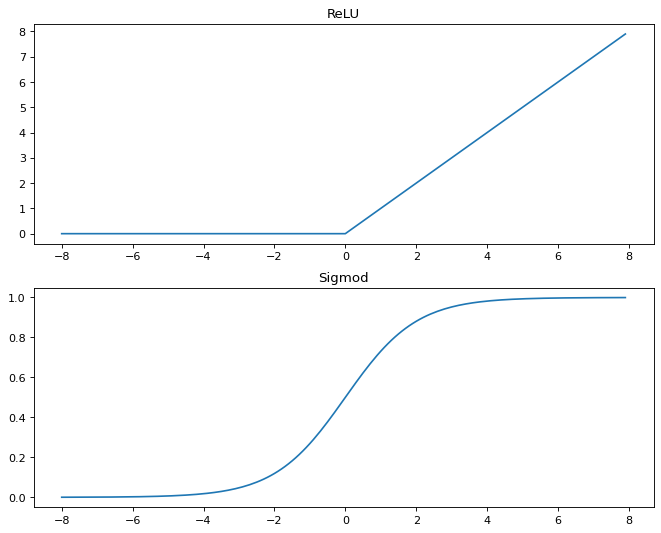

In [74]:
fig = plt.figure(figsize=(10,8), dpi= 80)
plt.subplot(2,  1,  1)  
x = torch.arange(-8.0, 8.0, 0.1, requires_grad=True)
y = torch.relu(x)
plt.plot(x.detach(), y.detach())
plt.title('ReLU')

plt.subplot(2,  1, 2)  
y = torch.sigmoid(x)
plt.plot(x.detach(), y.detach())
plt.title('Sigmod')

<div align=center>
    <img src="images/图像识别/幻灯片11.JPG" alt="幻灯片" style="zoom:80%;" />

In [156]:
import numpy as np
import torch

# 定义单个神经元 2输入
net = torch.nn.Sequential(torch.nn.Linear(2,1), torch.nn.ReLU())#torch.nn.Hardtanh(min_val=0,max_val=3,inplace=True)) #

# 定义权重
w = torch.tensor([1,1]).type(torch.float32)
b = -0.5

net[0].weight.data = w.reshape(net[0].weight.shape)
net[0].bias.data.fill_(b)

# 验证输出
x = torch.tensor([0.0, 0.0]).type(torch.float32)
print('The result is', net.forward(x).data[0].data)

torch.matmul(x, w) + b


The result is tensor(0.)


tensor(-0.5000)

<div align=center>
    <img src="images/图像识别/幻灯片12.JPG" alt="幻灯片" style="zoom:120%;" />

In [12]:
import matplotlib.pyplot as plt
import torch

In [25]:
x = torch.linspace(-2, 3, steps =100) 
y = torch.exp(x)

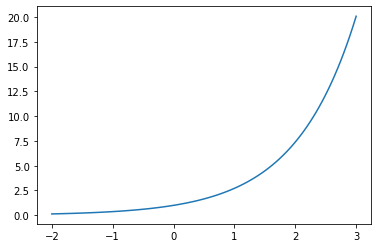

In [26]:
plt.plot(x,y)
plt.show()